In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df = pd.read_csv('Iris dataset.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df1=df.drop(columns = 'Id')

In [5]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to display no. of samples on each class

df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [9]:
# check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

In [10]:
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

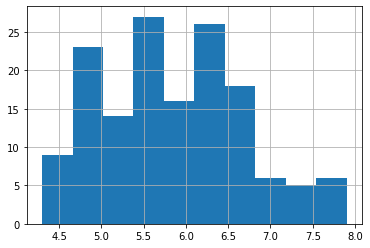

In [11]:
# histograms

df1['SepalLengthCm'].hist()

<AxesSubplot:>

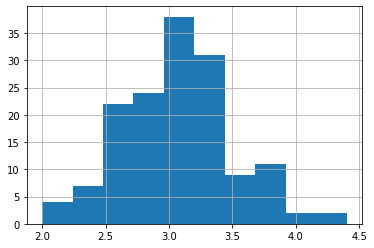

In [12]:
df1['SepalWidthCm'].hist()

<AxesSubplot:>

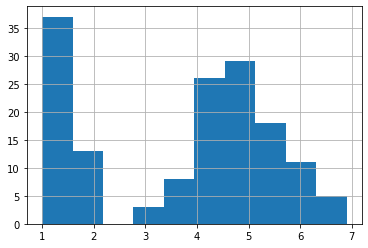

In [13]:
df1['PetalLengthCm'].hist()

<AxesSubplot:>

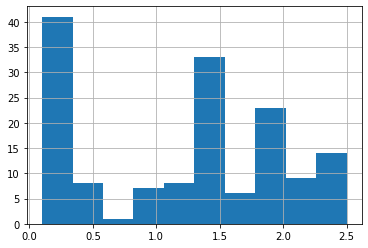

In [14]:
df1['PetalWidthCm'].hist()

<AxesSubplot:>

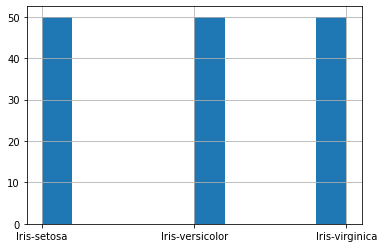

In [15]:
# this is wrong because its categorical values
df1['Species'].hist()

In [16]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = df[df['Species']==species[i]]

# Coorelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.



In [42]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

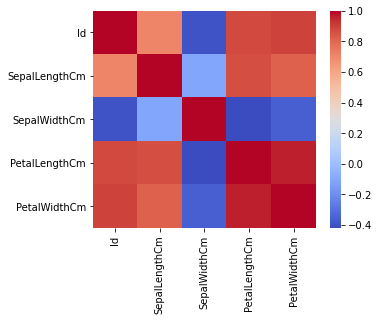

In [45]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = False, ax=ax, cmap = 'coolwarm')

<AxesSubplot:>

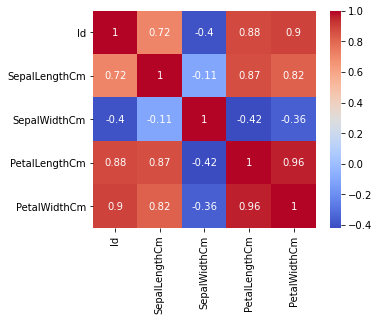

In [44]:
## Adding annotations to the data to show correlation between variables

corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'coolwarm')

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
le

LabelEncoder()

In [50]:
type(le)

sklearn.preprocessing._label.LabelEncoder

In [53]:
df1['Species'] = le.fit_transform(df1['Species'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df1['Species'] = le.fit_transform(df1['Species'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [57]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [58]:
df1['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Model Training

In [62]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df1.drop(columns=['Species'])
Y = df1['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [63]:
x_train.count()

SepalLengthCm    105
SepalWidthCm     105
PetalLengthCm    105
PetalWidthCm     105
dtype: int64

In [64]:
x_test.count()

SepalLengthCm    45
SepalWidthCm     45
PetalLengthCm    45
PetalWidthCm     45
dtype: int64

In [65]:
y_train.count()

105

In [66]:
y_test.count()

45

In [67]:
y_train.value_counts()

0    36
2    36
1    33
Name: Species, dtype: int64

In [68]:
y_test.value_counts()

1    17
0    14
2    14
Name: Species, dtype: int64

In [69]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression()

In [72]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
# print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [75]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier()

In [76]:
# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [77]:
# print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [78]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [79]:
# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
# print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333
